In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from keras.utils import np_utils
import tensorflow

In [44]:
import os

In [45]:
folders=os.listdir("Images")


In [46]:
for f in folders:
    path="Images/"+f
    print(f+"  "+str(len(os.listdir(path))))

cats  202
dogs  202
horses  202
humans  202


In [47]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [48]:
sample_path="Images/cats/cat.1.jpg"
img=image.load_img(sample_path)

In [49]:
x=image.img_to_array(img)/255.0

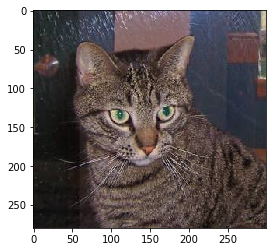

In [50]:
plt.imshow(x)
plt.show()

In [55]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 15, 15, 128)      

In [58]:
from keras import optimizers
adam=optimizers.adam(lr=1e-4)

In [60]:
model.compile(loss='categorical_crossentropy',metrics=["accuracy"],optimizer=adam)

model.fit(_____) # useful when data is small and fit inside memory

In [62]:
from keras.preprocessing.image import ImageDataGenerator

In [64]:
train_gen=ImageDataGenerator(rescale=1.0/255)


In [71]:
train_generator=train_gen.flow_from_directory(
    "images/",
    target_size=(150,150),
    batch_size=32,
    class_mode="categorical"
)

Found 808 images belonging to 4 classes.


In [72]:
train_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [73]:
x,y=train_generator.next()
print(x.shape,y.shape)

(32, 150, 150, 3) (32, 4)


In [78]:
for (x,y) in train_generator:
    print(x.shape,y.shape)
    break;

(32, 150, 150, 3) (32, 4)


In [79]:
hist=model.fit_generator(
    train_generator,
    epochs=20,
    steps_per_epoch=7
)

Epoch 1/20
7/7 [==============================] - 11s 2s/step - loss: 1.3891 - accuracy: 0.2550
Epoch 2/20
7/7 [==============================] - 11s 2s/step - loss: 1.3775 - accuracy: 0.2634
Epoch 3/20
7/7 [==============================] - 11s 2s/step - loss: 1.3840 - accuracy: 0.2902
Epoch 4/20
7/7 [==============================] - 11s 2s/step - loss: 1.3693 - accuracy: 0.3080
Epoch 5/20
7/7 [==============================] - 13s 2s/step - loss: 1.3604 - accuracy: 0.2750
Epoch 6/20
7/7 [==============================] - 13s 2s/step - loss: 1.3345 - accuracy: 0.4152
Epoch 7/20
7/7 [==============================] - 14s 2s/step - loss: 1.3167 - accuracy: 0.2991
Epoch 8/20
7/7 [==============================] - 12s 2s/step - loss: 1.3153 - accuracy: 0.3616
Epoch 9/20
7/7 [==============================] - 13s 2s/step - loss: 1.2806 - accuracy: 0.4241
Epoch 10/20
7/7 [==============================] - 13s 2s/step - loss: 1.2503 - accuracy: 0.3884
Epoch 11/20
7/7 [======================